## HPL Analysis

In [17]:
# importing packages

import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [18]:
# dataframes initialization

csv_folder = "../csv"
c1_np_file_path = f"{csv_folder}/hpl_test-c1.csv"
c1_p_file_path = f"{csv_folder}/hpl_test-c1-pinning.csv"
c2_np_file_path = f"{csv_folder}/hpl_test-c2.csv"
c2_p_file_path = f"{csv_folder}/hpl_test-c2-pinning.csv"
vm1_file_path = f"{csv_folder}/hpl_test-vm1.csv"
vm2_file_path = f"{csv_folder}/hpl_test-vm2.csv"

c1_np_df = pd.read_csv(c1_np_file_path)
c1_p_df = pd.read_csv(c1_p_file_path)
c2_np_df = pd.read_csv(c2_np_file_path)
c2_p_df = pd.read_csv(c2_p_file_path)
vm1_df = pd.read_csv(vm1_file_path)
vm2_np_df = pd.read_csv(vm2_file_path)

c1_np_df = c1_np_df.drop(columns=['T/V', 'Run'])
c1_p_df = c1_p_df.drop(columns=['T/V', 'Run'])
c2_np_df = c2_np_df.drop(columns=['T/V', 'Run'])
c2_p_df = c2_p_df.drop(columns=['T/V', 'Run'])
vm1_df = vm1_df.drop(columns=['T/V', 'Run'])
vm2_df = vm2_np_df.drop(columns=['T/V', 'Run'])


c1_np_df = c1_np_df.groupby(['N', 'NB', 'P', 'Q']).agg(['mean', 'std']).reset_index()
c1_p_df = c1_p_df.groupby(['N', 'NB', 'P', 'Q']).agg(['mean', 'std']).reset_index()
c2_np_df = c2_np_df.groupby(['N', 'NB', 'P', 'Q']).agg(['mean', 'std']).reset_index()
c2_p_df = c2_p_df.groupby(['N', 'NB', 'P', 'Q']).agg(['mean', 'std']).reset_index()
vm1_df = vm1_df.groupby(['N', 'NB', 'P', 'Q']).agg(['mean', 'std']).reset_index()
vm2_df = vm2_df.groupby(['N', 'NB', 'P', 'Q']).agg(['mean', 'std']).reset_index()

In [19]:
# df example
c1_np_df.head()

N   NB  P  Q  Time             Gflops          
                    mean       std     mean       std
0  1024   32  2  2  0.01  0.000000  80.2284  3.241200
1  1024   64  2  2  0.01  0.000000  73.4864  3.857224
2  1024  128  2  2  0.01  0.000000  60.9972  4.201542
3  1024  256  2  2  0.02  0.000000  43.4464  2.387824
4  2048   32  2  2  0.07  0.007071  81.6134  7.282211

### Find the best P Q for VM2 and CT2

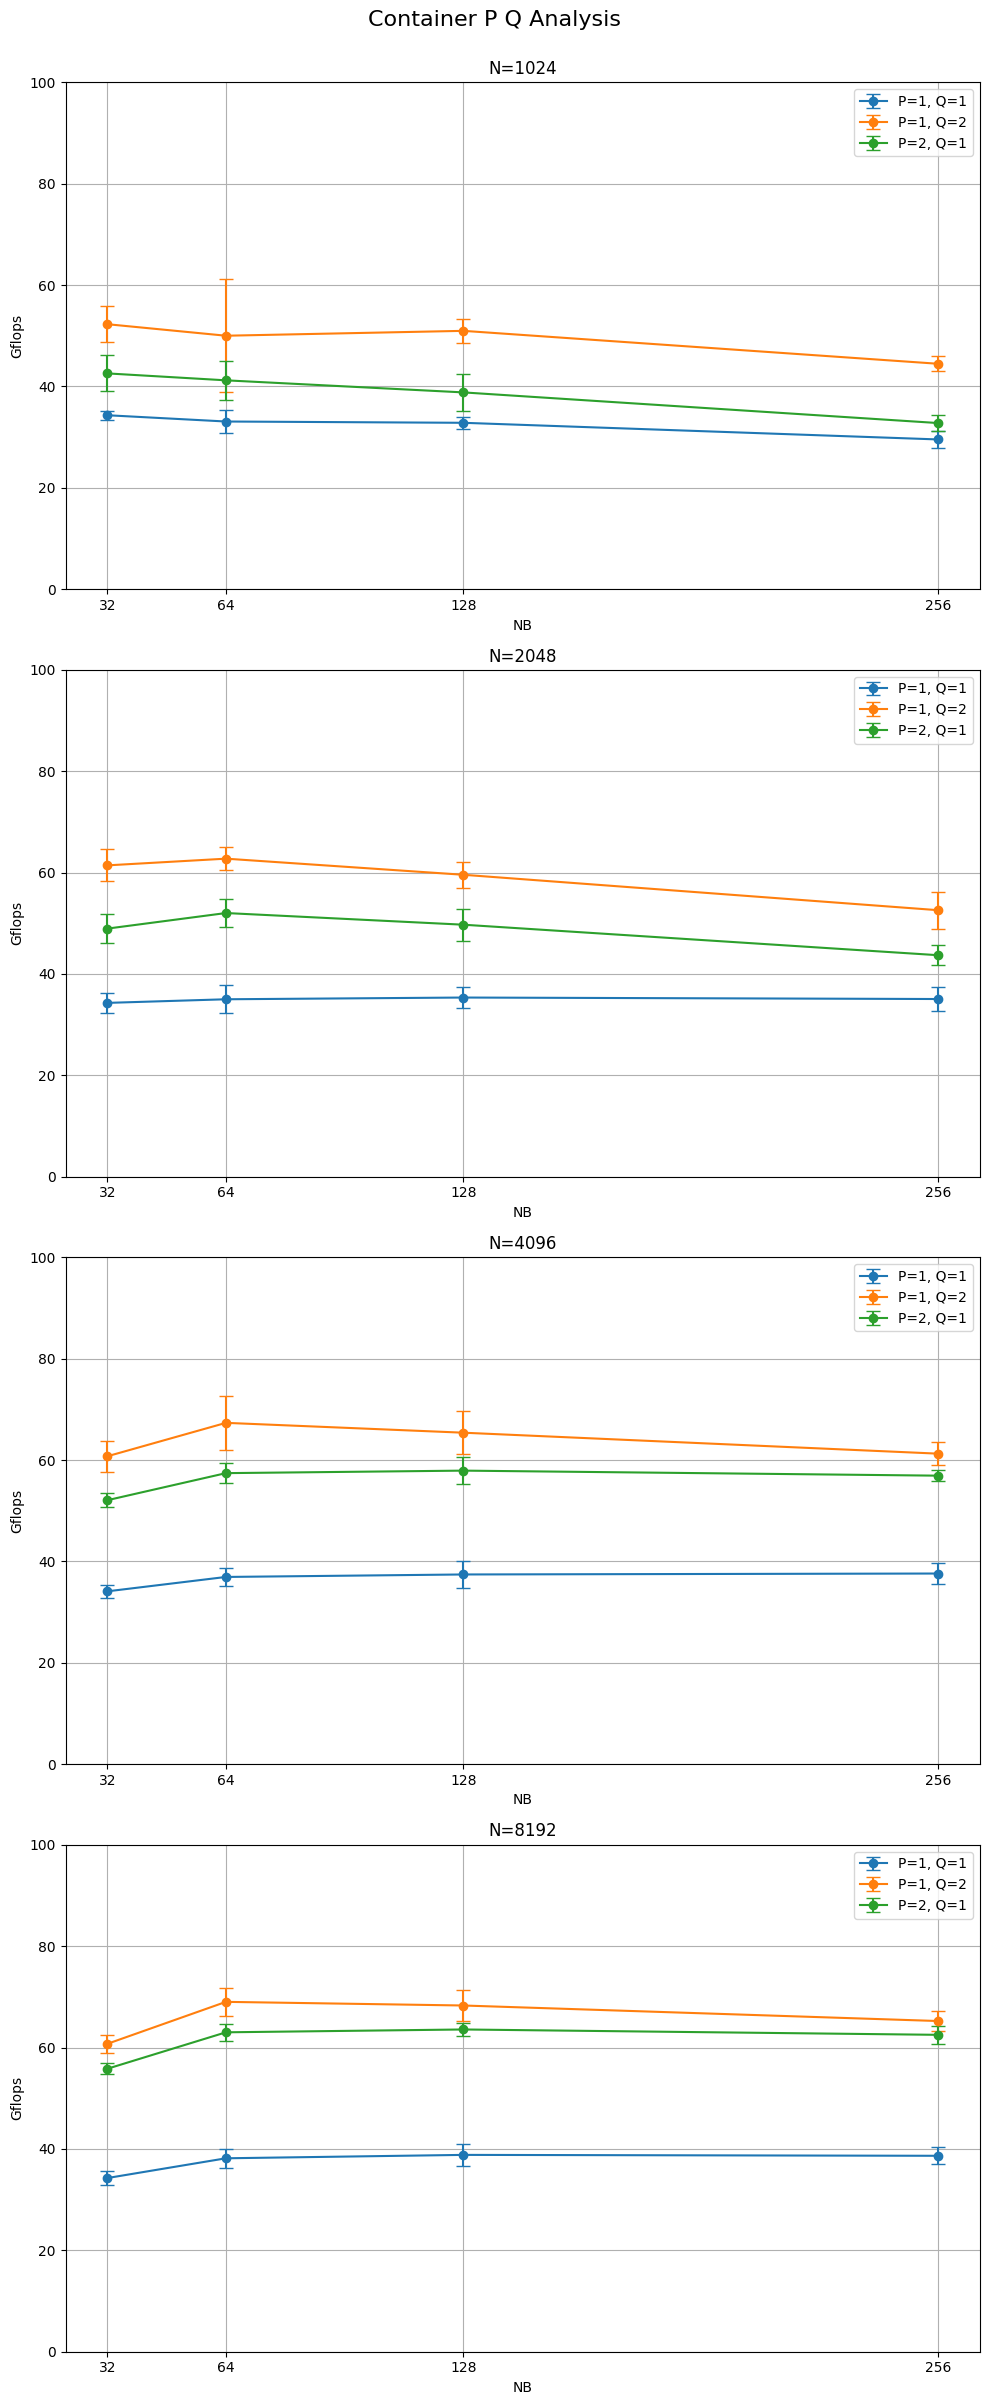

In [20]:
# Container P Q comparison
unique_N = c2_np_df[('N', )].unique()

# Set up the grid for subplots
fig, axs = plt.subplots(len(unique_N), 1, figsize=(10, 6 * len(unique_N)))
fig.suptitle("Container P Q Analysis", fontsize=16, y=1)

# Iterate over each unique N value
for i, n in enumerate(unique_N):
  # Filter the dataframe for the current N value
  df_n = c2_np_df[c2_np_df[('N', )] == n]
  
  # Get unique P and Q combinations
  unique_PQ = df_n.groupby([('P', ), ('Q', )]).size().reset_index().drop(0, axis=1)
  
  # Plot for each P and Q combination
  for _, row in unique_PQ.iterrows():
    p = row[('P', )]
    q = row[('Q', )]
    df_pq = df_n[(df_n[('P', )] == p) & (df_n[('Q', )] == q)]
    axs[i].errorbar(df_pq[('NB', )], df_pq[('Gflops', 'mean')], yerr=df_pq[('Gflops', 'std')], label=f'P={p}, Q={q}', marker='o', capsize=5)
  
  # Set plot title and labels
  axs[i].set_title(f'N={n}')
  axs[i].set_xlabel('NB')
  axs[i].set_ylabel('Gflops')
  axs[i].set_ylim([0, 100])
  axs[i].set_xticks(df_n[('NB', )].unique())
  axs[i].legend()
  axs[i].grid(True)

plt.tight_layout()
plt.show()
  

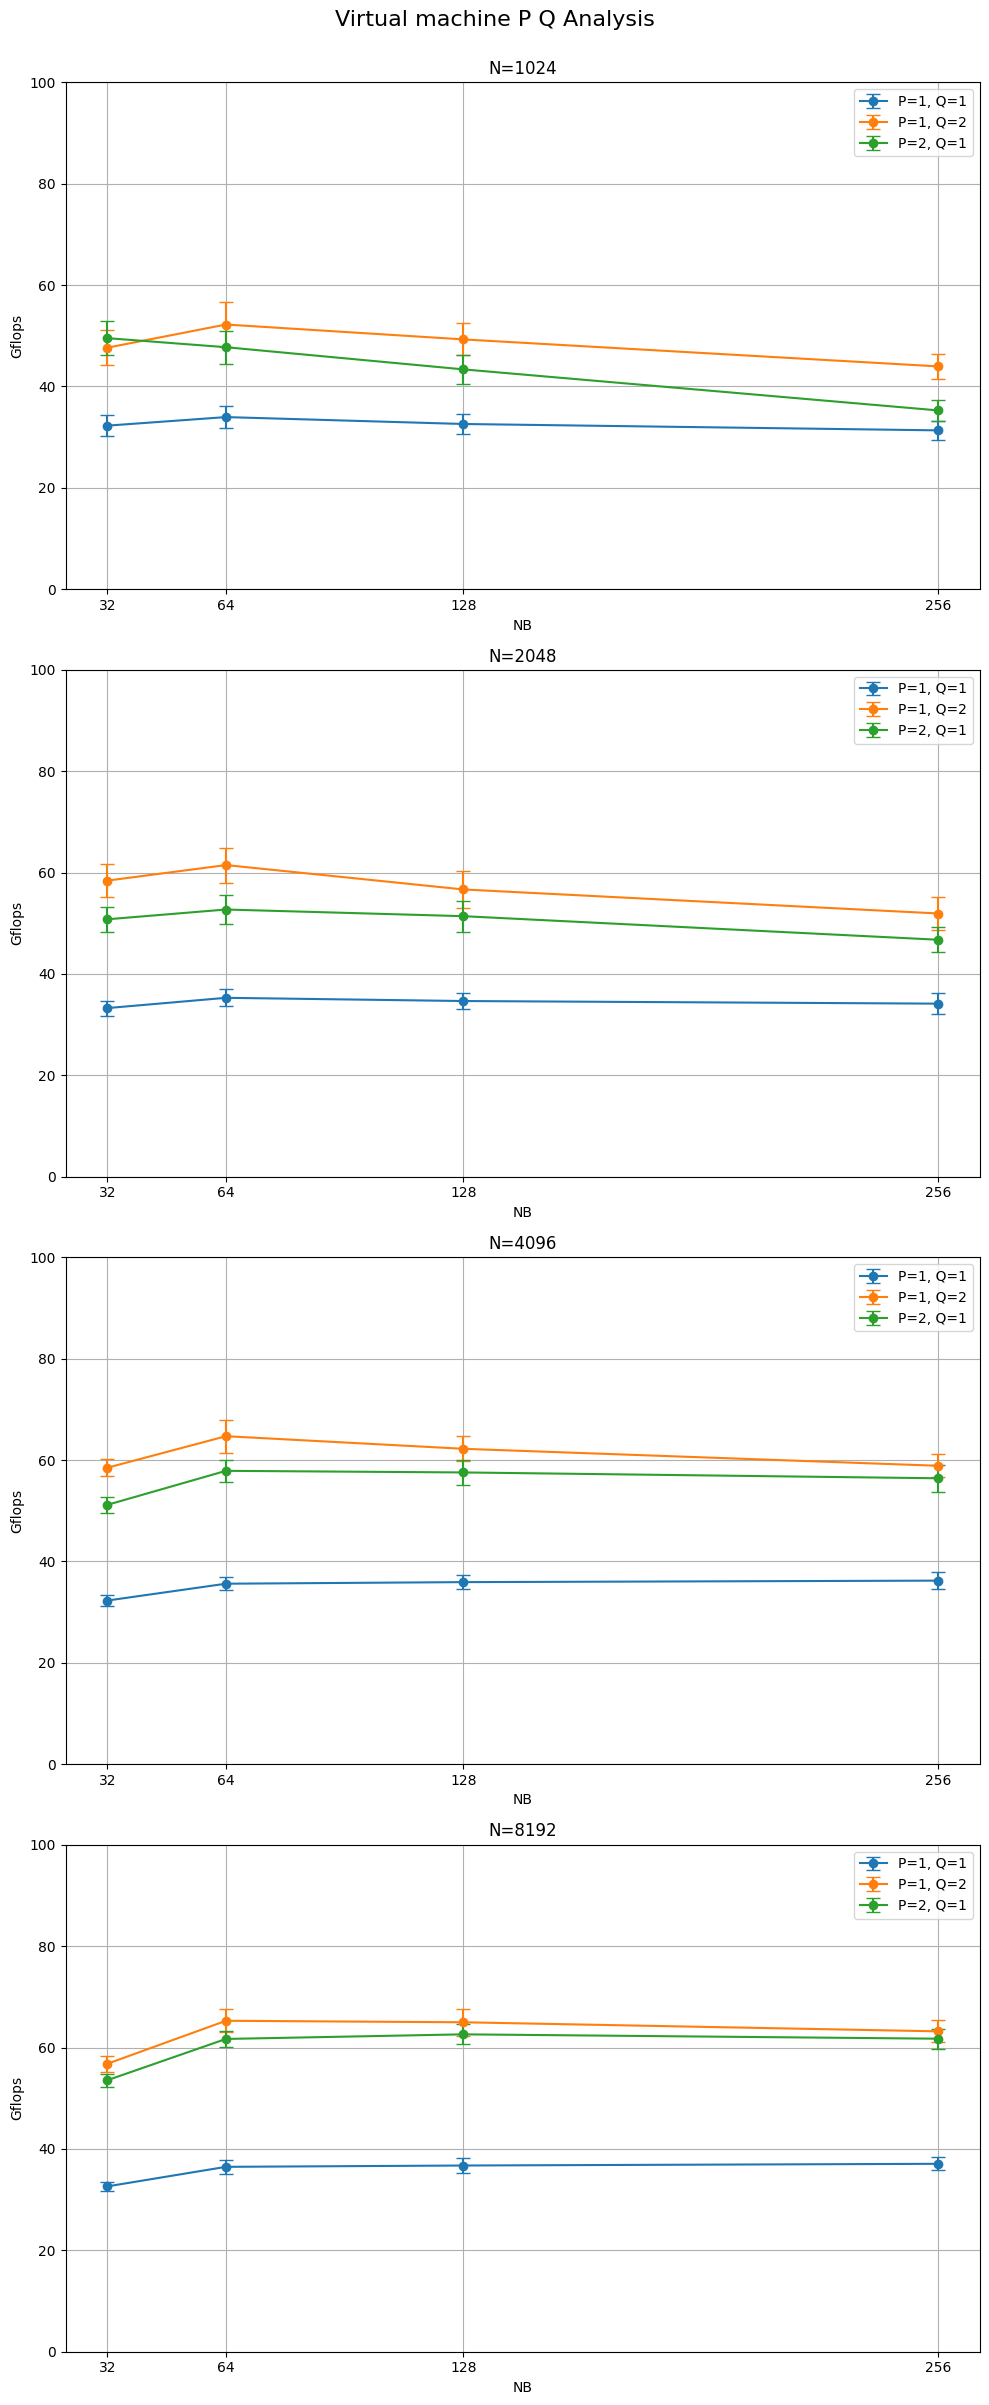

In [21]:
# VM P Q comparison
unique_N = vm2_df[('N', )].unique()

# Set up the grid for subplots
fig, axs = plt.subplots(len(unique_N), 1, figsize=(10, 6 * len(unique_N)))
fig.suptitle("Virtual machine P Q Analysis", fontsize=16, y=1)

# Iterate over each unique N value
for i, n in enumerate(unique_N):
  # Filter the dataframe for the current N value
  df_n = vm2_df[vm2_df[('N', )] == n]
  
  # Get unique P and Q combinations
  unique_PQ = df_n.groupby([('P', ), ('Q', )]).size().reset_index().drop(0, axis=1)
  
  # Plot for each P and Q combination
  for _, row in unique_PQ.iterrows():
    p = row[('P', )]
    q = row[('Q', )]
    df_pq = df_n[(df_n[('P', )] == p) & (df_n[('Q', )] == q)]
    axs[i].errorbar(df_pq[('NB', )], df_pq[('Gflops', 'mean')], yerr=df_pq[('Gflops', 'std')], label=f'P={p}, Q={q}', marker='o', capsize=5)
  
  # Set plot title and labels
  axs[i].set_title(f'N={n}')
  axs[i].set_xlabel('NB')
  axs[i].set_ylabel('Gflops')
  axs[i].set_ylim([0, 100])
  axs[i].set_xticks(df_n[('NB', )].unique())
  axs[i].legend()
  axs[i].grid(True)

plt.tight_layout()
plt.show()

It is clear that P=1 and Q=2 is the best option.

In [22]:
# Defining bets P Q values
best_P = 1
best_Q = 2

### Comparison between container cpu pinning and not

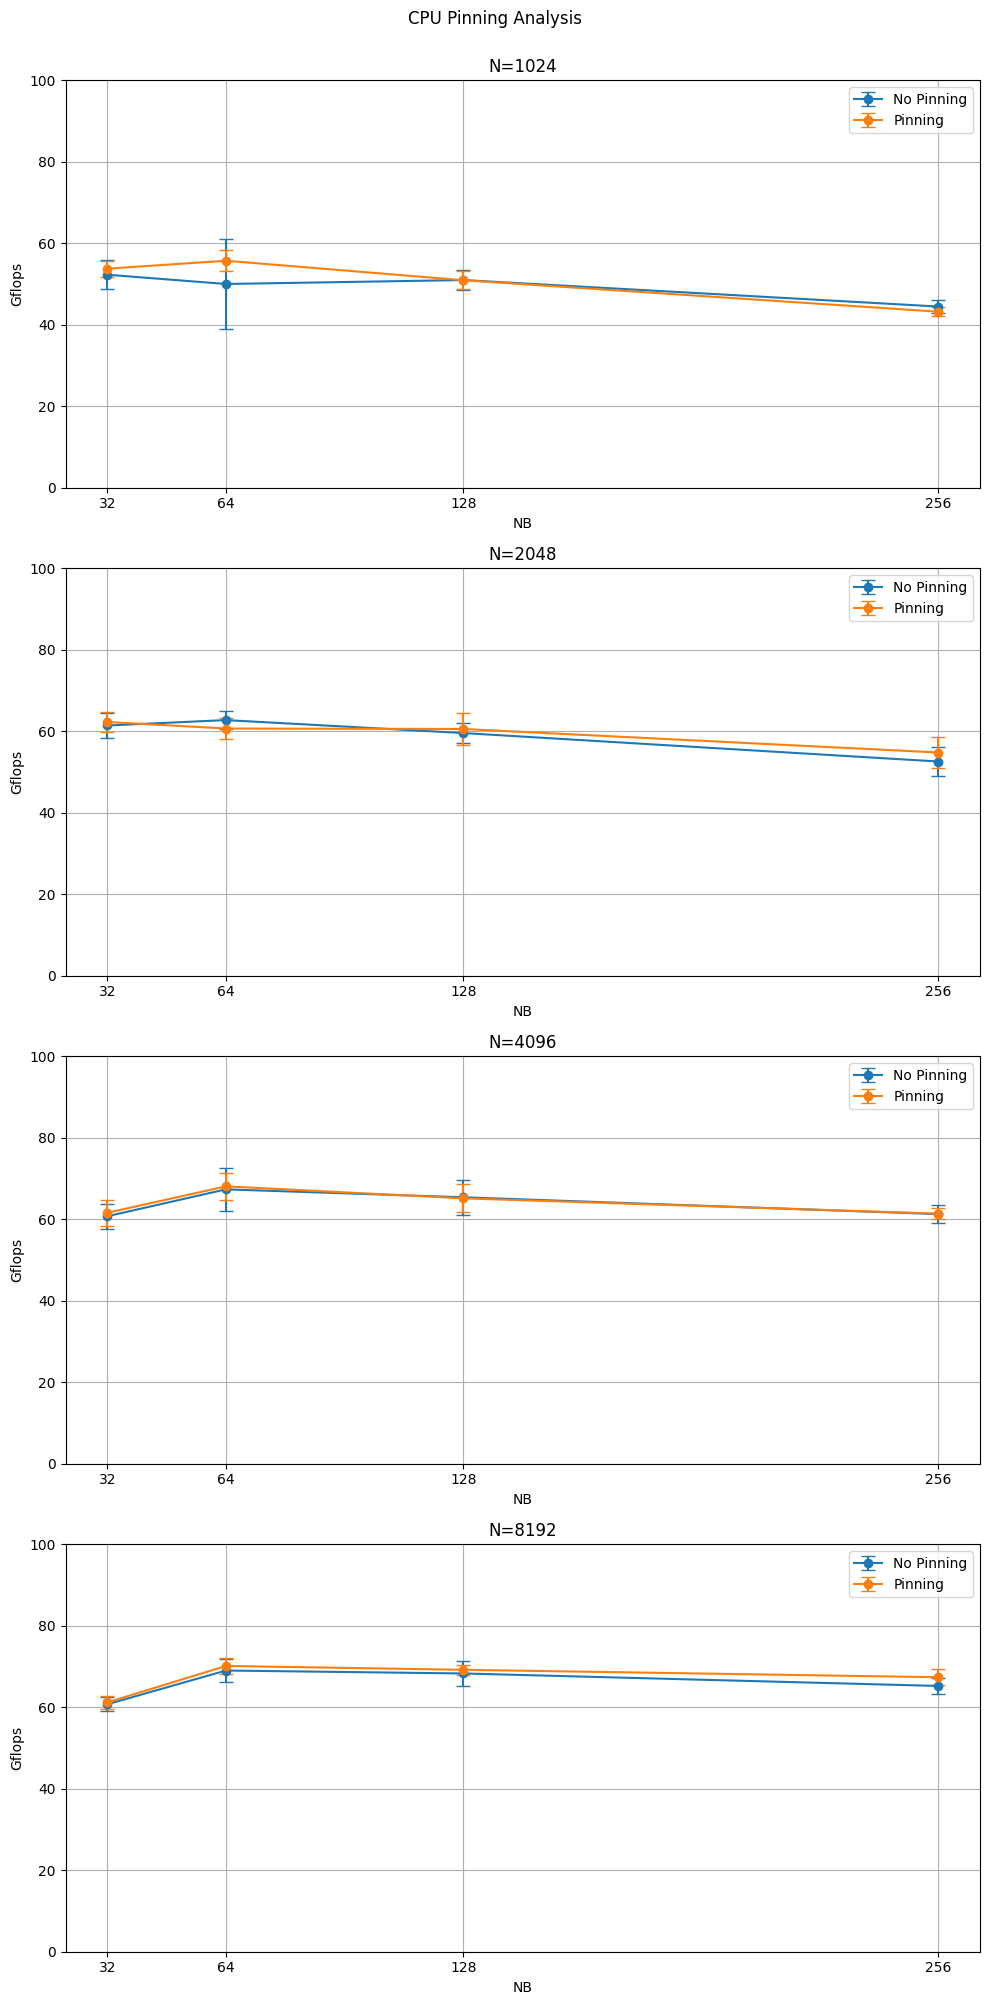

In [31]:
# C2 comparison
N_values = c2_np_df[('N', '')].unique()

fig, axes = plt.subplots(len(N_values), 1, figsize=(10, 5 * len(N_values)))
fig.suptitle("CPU Pinning Analysis", y=1)

for i, N in enumerate(N_values):
  c2_np_filtered = c2_np_df[(c2_np_df[('N', '')] == N) & (c2_np_df[('P', '')] == best_P) & (c2_np_df[('Q', '')] == best_Q)]
  c2_p_filtered = c2_p_df[(c2_p_df[('N', '')] == N) & (c2_p_df[('P', '')] == best_P) & (c2_p_df[('Q', '')] == best_Q)]

  axes[i].errorbar(c2_np_filtered[('NB', '')], c2_np_filtered[('Gflops', 'mean')], yerr=c2_np_filtered[('Gflops', 'std')], label='No Pinning', marker='o', capsize=5)
  axes[i].errorbar(c2_p_filtered[('NB', '')], c2_p_filtered[('Gflops', 'mean')], yerr=c2_p_filtered[('Gflops', 'std')], label='Pinning', marker='o', capsize=5)
  
  axes[i].set_title(f'N={N}')
  axes[i].set_xlabel('NB')
  axes[i].set_ylabel('Gflops')
  axes[i].set_ylim([0, 100])
  axes[i].set_xticks(c2_np_filtered[('NB', )].unique())
  axes[i].grid(True)
  axes[i].legend()

plt.tight_layout()
plt.show()

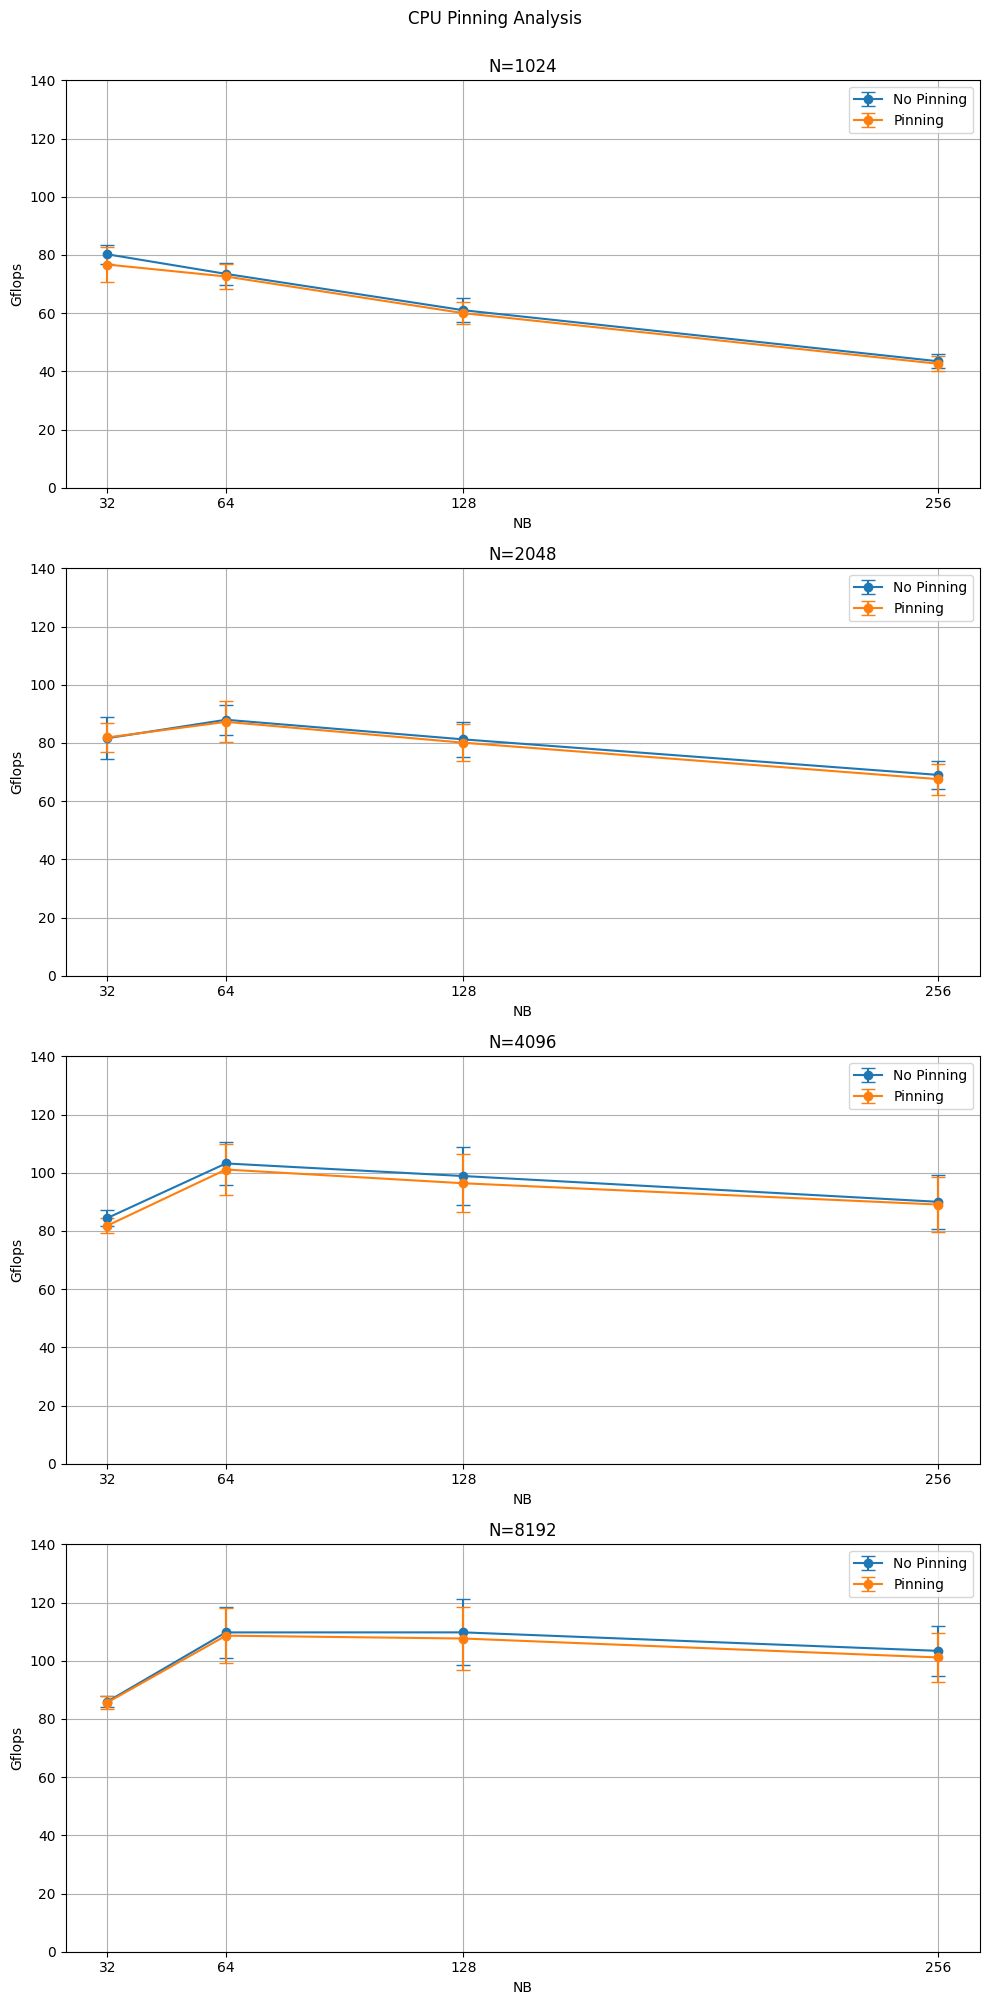

In [32]:
# C1 comparison
N_values = c1_np_df[('N', '')].unique()

fig, axes = plt.subplots(len(N_values), 1, figsize=(10, 5 * len(N_values)))
fig.suptitle("CPU Pinning Analysis", y=1)

for i, N in enumerate(N_values):
  c1_np_filtered = c1_np_df[(c1_np_df[('N', '')] == N)]
  c1_p_filtered = c1_p_df[(c1_p_df[('N', '')] == N)]

  axes[i].errorbar(c1_np_filtered[('NB', '')], c1_np_filtered[('Gflops', 'mean')], yerr=c1_np_filtered[('Gflops', 'std')], label='No Pinning', marker='o', capsize=5)
  axes[i].errorbar(c1_p_filtered[('NB', '')], c1_p_filtered[('Gflops', 'mean')], yerr=c1_p_filtered[('Gflops', 'std')], label='Pinning', marker='o', capsize=5)
  
  axes[i].set_title(f'N={N}')
  axes[i].set_xlabel('NB')
  axes[i].set_ylabel('Gflops')
  axes[i].set_ylim([0, 140])
  axes[i].set_xticks(c1_np_filtered[('NB', )].unique())
  axes[i].grid(True)
  axes[i].legend()

plt.tight_layout()
plt.show()

No clear evidence that pinning is performing better. So I decide to consider as best performance the no-pinning container, because it gives to the machine a wider freedom on the management of cpu resources.

### Comparison between VM1 and VM2

In [25]:
# Find the best N for vm1 and vm2
best_N_vm1 = vm1_df[vm1_df[('Gflops', 'mean')] == vm1_df[('Gflops', 'mean')].max()]['N'].item()
best_N_vm2 = vm2_df[vm2_df[('Gflops', 'mean')] == vm2_df[('Gflops', 'mean')].max()]['N'].item()

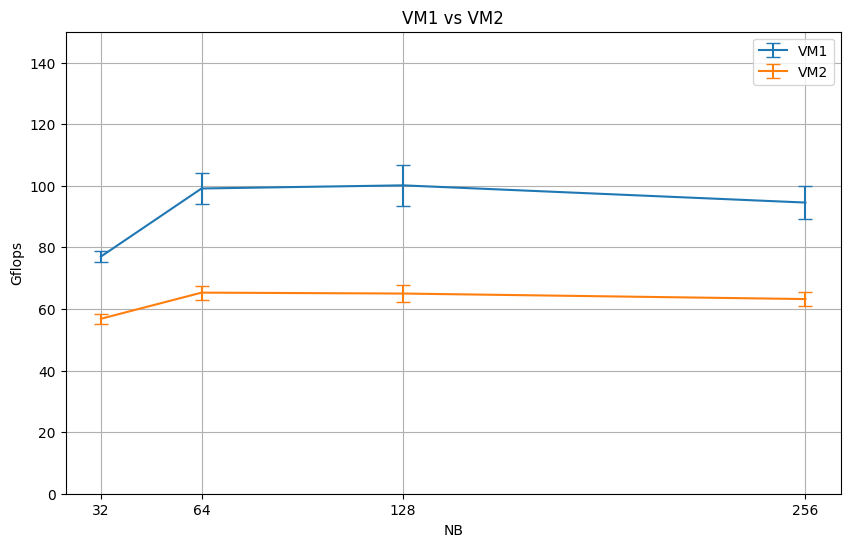

In [26]:
# performance comparison between vm1 and vm2
best_vm1 = vm1_df[vm1_df['N'] == best_N_vm1]
best_vm2 = vm2_df[(vm2_df['N'] == best_N_vm2) & (vm2_df['P'] == best_P) & (vm2_df['Q'] == best_Q)]
plt.figure(figsize=(10,6))
plt.errorbar(best_vm1[('NB', )], best_vm1[('Gflops', 'mean')], yerr=best_vm1[('Gflops', 'std')], label='VM1', capsize=5)
plt.errorbar(best_vm2[('NB', )], best_vm2[('Gflops', 'mean')], yerr=best_vm2[('Gflops', 'std')], label='VM2', capsize=5)
plt.xticks(vm1_df['NB'].unique())
plt.xlabel('NB')
plt.ylabel('Gflops')
plt.title("VM1 vs VM2")
plt.ylim(0,150)
plt.grid(True)
plt.legend()

### Comparison between C1 and C2

In [27]:
# Find the best N for c1 and c2
best_N_c1 = c1_np_df[c1_np_df[('Gflops', 'mean')] == c1_np_df[('Gflops', 'mean')].max()]['N'].item()
best_N_c2 = c2_np_df[c2_np_df[('Gflops', 'mean')] == c2_np_df[('Gflops', 'mean')].max()]['N'].item()

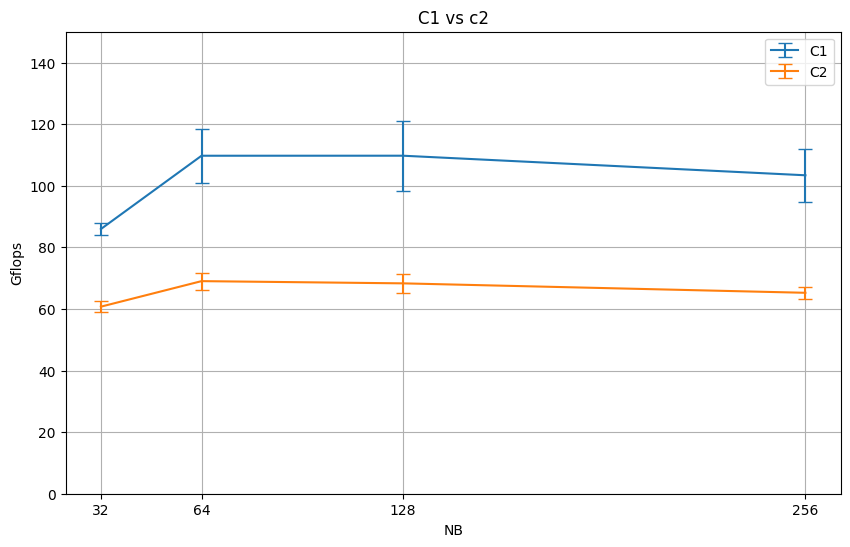

In [28]:
# performance comparison between c2 and c1
best_c1 = c1_np_df[c1_np_df['N'] == best_N_c1]
best_c2 = c2_np_df[(c2_np_df['N'] == best_N_c2) & (c2_np_df['P'] == best_P) & (c2_np_df['Q'] == best_Q)]
plt.figure(figsize=(10,6))
plt.errorbar(best_c1[('NB', )], best_c1[('Gflops', 'mean')], yerr=best_c1[('Gflops', 'std')], label='C1', capsize=5)
plt.errorbar(best_c2[('NB', )], best_c2[('Gflops', 'mean')], yerr=best_c2[('Gflops', 'std')], label='C2', capsize=5)
plt.xticks(c1_np_df['NB'].unique())
plt.xlabel('NB')
plt.ylabel('Gflops')
plt.title("C1 vs c2")
plt.ylim(0,150)
plt.grid(True)
plt.legend()

### Comparison VM1 vs C1 & VM2 vs C2

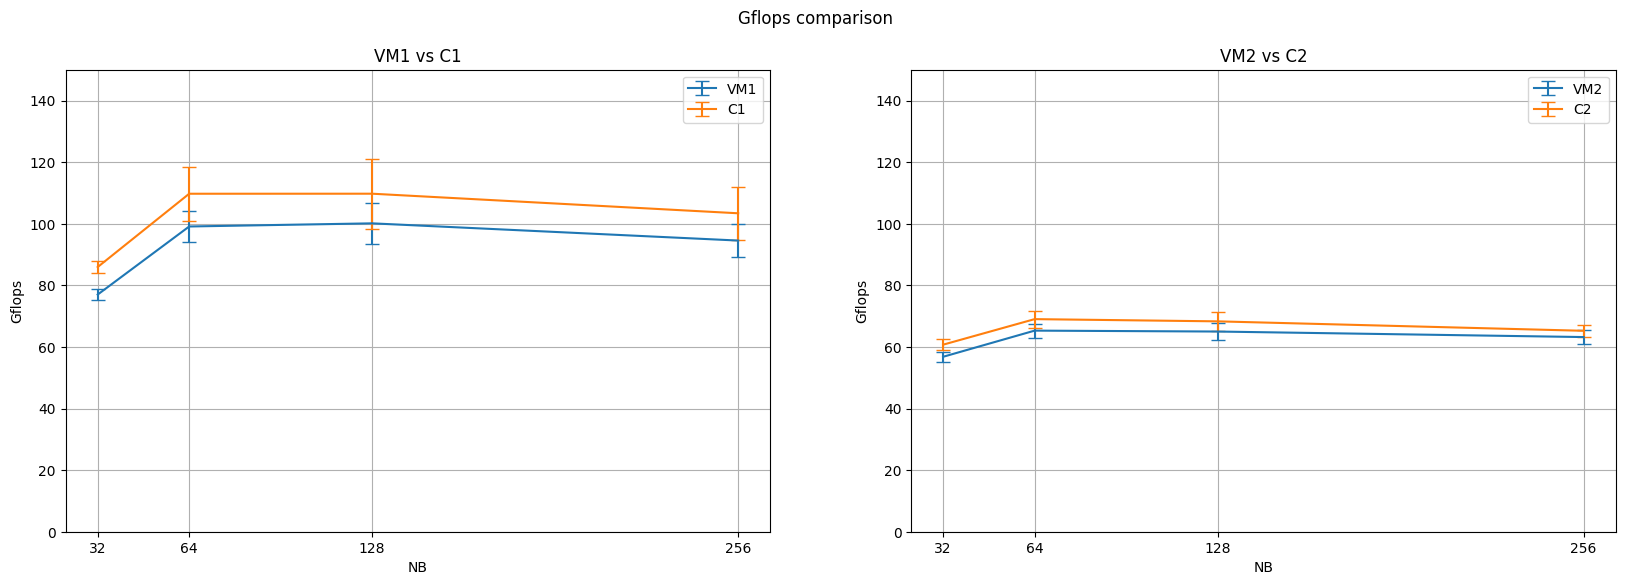

In [29]:
# Gflops comparison
fig, axes = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Gflops comparison")

axes[0].errorbar(best_vm1[('NB', )], best_vm1[('Gflops', 'mean')], yerr=best_vm1[('Gflops', 'std')], label='VM1', capsize=5)
axes[0].errorbar(best_c1[('NB', )], best_c1[('Gflops', 'mean')], yerr=best_c1[('Gflops', 'std')], label='C1', capsize=5)
axes[0].set_xticks(c1_np_df['NB'].unique())
axes[0].set_xlabel('NB')
axes[0].set_ylabel('Gflops')
axes[0].set_title("VM1 vs C1")
axes[0].set_ylim(0,150)
axes[0].grid(True)
axes[0].legend()

axes[1].errorbar(best_vm2[('NB', )], best_vm2[('Gflops', 'mean')], yerr=best_vm2[('Gflops', 'std')], label='VM2', capsize=5)
axes[1].errorbar(best_c2[('NB', )], best_c2[('Gflops', 'mean')], yerr=best_c2[('Gflops', 'std')], label='C2', capsize=5)
axes[1].set_xticks(c1_np_df['NB'].unique())
axes[1].set_xlabel('NB')
axes[1].set_ylabel('Gflops')
axes[1].set_title("VM2 vs C2")
axes[1].set_ylim(0,150)
axes[1].grid(True)
axes[1].legend()

Better performances are notable in favour of the containers wrt vms.

In [40]:
print(best_vm2.iloc[0]["Gflops"])
print(best_c2.iloc[0]["Gflops"])

mean    56.800967
std      1.617906
Name: 37, dtype: float64
mean    60.732200
std      1.707257
Name: 37, dtype: float64


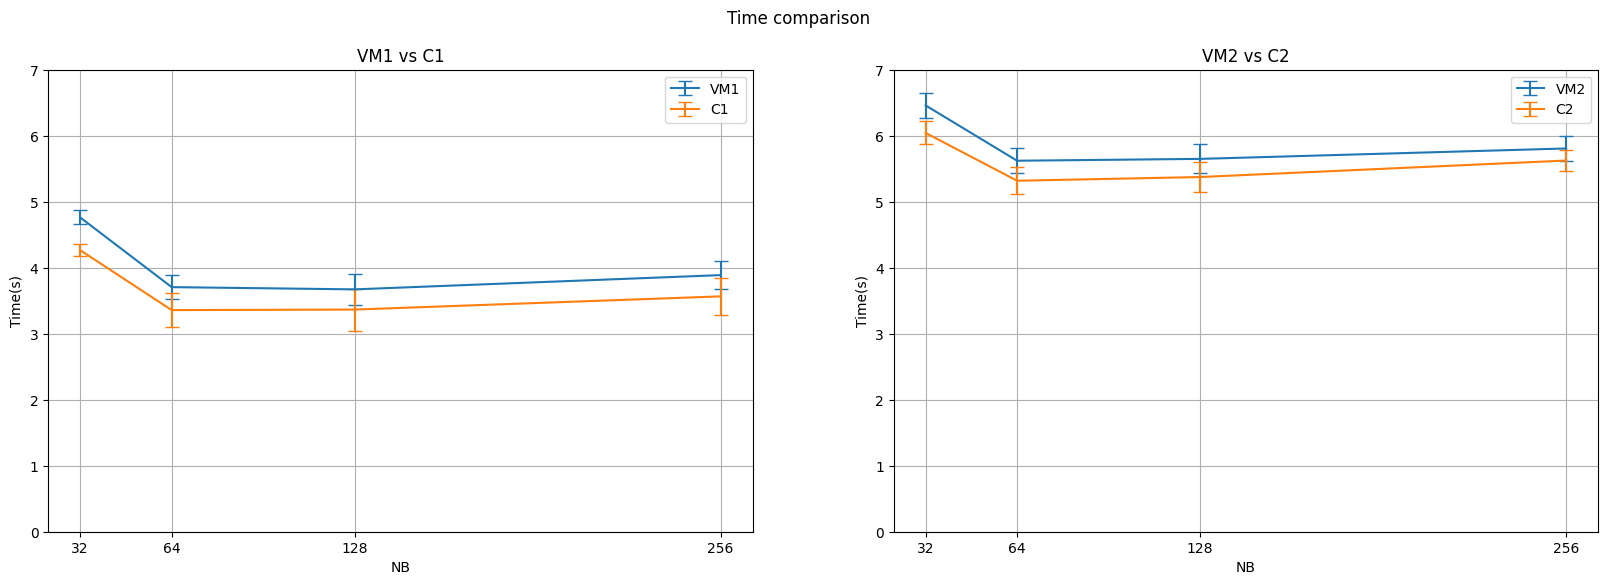

In [30]:
# time comparison
fig, axes = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Time comparison")

axes[0].errorbar(best_vm1[('NB', )], best_vm1[('Time', 'mean')], yerr=best_vm1[('Time', 'std')], label='VM1', capsize=5)
axes[0].errorbar(best_c1[('NB', )], best_c1[('Time', 'mean')], yerr=best_c1[('Time', 'std')], label='C1', capsize=5)
axes[0].set_xticks(c1_np_df['NB'].unique())
axes[0].set_xlabel('NB')
axes[0].set_ylabel('Time(s)')
axes[0].set_title("VM1 vs C1")
axes[0].set_ylim(0,7)
axes[0].grid(True)
axes[0].legend()

axes[1].errorbar(best_vm2[('NB', )], best_vm2[('Time', 'mean')], yerr=best_vm2[('Time', 'std')], label='VM2', capsize=5)
axes[1].errorbar(best_c2[('NB', )], best_c2[('Time', 'mean')], yerr=best_c2[('Time', 'std')], label='C2', capsize=5)
axes[1].set_xticks(c1_np_df['NB'].unique())
axes[1].set_xlabel('NB')
axes[1].set_ylabel('Time(s)')
axes[1].set_title("VM2 vs C2")
axes[1].set_ylim(0,7)
axes[1].grid(True)
axes[1].legend()